# Boston House Price Prediction 

## Importing Libraries

In [5]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

## Loading Data

In [6]:
from sklearn.datasets import load_boston
boston_data = load_boston()
df = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
y = boston_data.target
X = df.values
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


## Features Selection

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
scaler = StandardScaler()
model = Ridge(alpha=0.1)
Stand_coef_linear_reg = make_pipeline(scaler, model)

In [8]:
Stand_coef_linear_reg.fit(X, y)
result = pd.DataFrame(list(zip(Stand_coef_linear_reg.steps[1][1].coef_, df.columns)), columns=['coefficient', 'name']).set_index('name')
np.abs(result).sort_values(by='coefficient', ascending=False)

,coefficient
name,
LSTAT,3.747365
DIS,3.101755
RM,2.671520
RAD,2.651537
TAX,2.069083
PTRATIO,2.061320
NOX,2.057276
ZN,1.079439
CRIM,0.919569


## Data Pre-Processing

In [62]:
X = df[['LSTAT']].values
X_sc = StandardScaler()
y_sc = StandardScaler()
X_std = X_sc.fit_transform(X)
y_std = y_sc.fit_transform(y.reshape(-1, 1)).flatten()

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
X_train, X_test, y_train, y_test = train_test_split(X_std, y_std, test_size = 0.2, random_state=42)

In [64]:
model.fit(X_train, y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [65]:
r2_score(y_test, model.predict(X_test))

0.5429449156846744

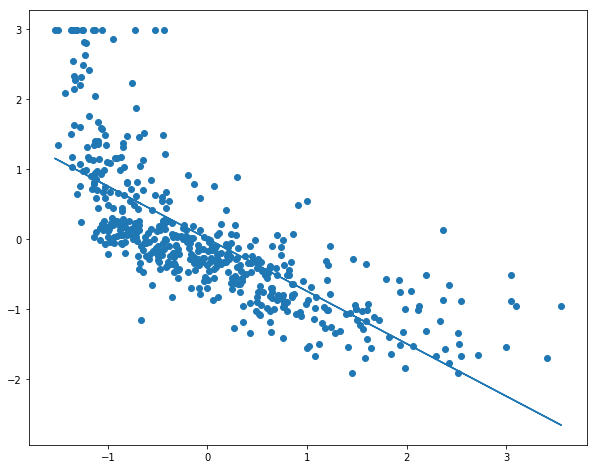

In [66]:
plt.figure(figsize=(10, 8))
plt.scatter(X_std, y_std)
plt.plot(X_std, model.predict(X_std))
plt.show()

## Polynomial Regression

In [67]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)

In [68]:
X_poly = poly_reg.fit_transform(X_std)
X_poly_train, X_poly_test, y_poly_train, y_poly_test = train_test_split(X_poly, y_std, test_size = 0.2, random_state=42)
ridge_2 = Ridge(alpha=10)
ridge_2.fit(X_poly_train, y_poly_train)

X_fit = np.arange(X_std.min(), X_std.max(), 1)[:, np.newaxis]

quad_model_pred = ridge_2.predict(poly_reg.fit_transform(X_fit.reshape(-1, 1)))
# quad_model_pred = ridge_2.predict(X_poly_train)

0.631070851547


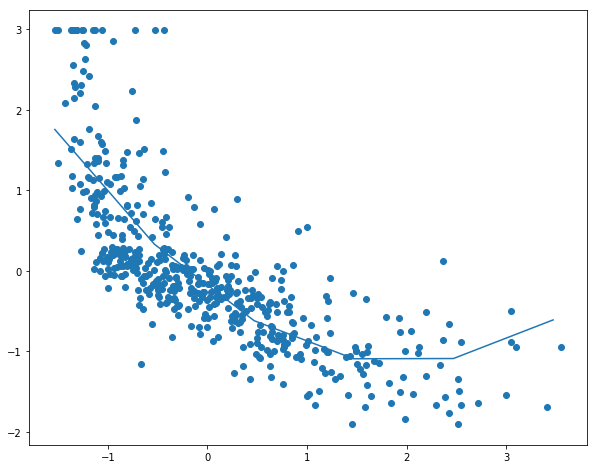

In [69]:
plt.figure(figsize=(10, 8))
plt.scatter(X_std, y_std)
plt.plot(X_fit, quad_model_pred)
print(r2_score(y_poly_test, ridge_2.predict(X_poly_test)))
plt.show()